In [90]:
# pandas: A library used for data manipulation and analysis, particularly for handling tabular data in DataFrames.
# numpy: A library for numerical computations, providing support for arrays, matrices, and a wide range of mathematical functions.
# matplotlib.pyplot: A plotting library used for creating static, interactive, and animated visualizations in Python.
# tensorflow: An open-source library developed by Google for building and deploying machine learning and deep learning models.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [92]:
# Load dataset
data = pd.read_csv("2.Imperial-Predicting Cardiovascular Disease Risk/heart_disease_uci.csv")

# Display the first few rows of the dataset
data.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


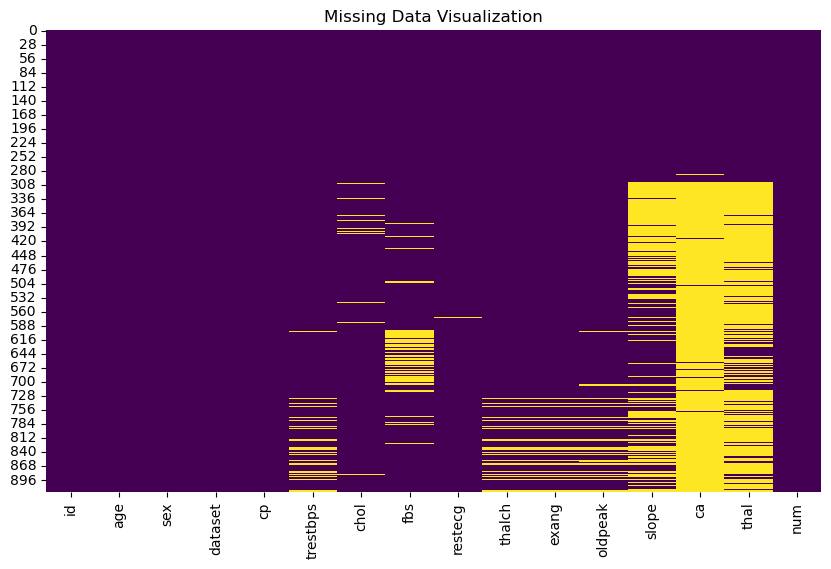

In [94]:
# Visualize missing data
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Visualization")
plt.show()

In [96]:
print(data.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [98]:
# Data Processing (Feature Selection and One-Hot Encoding)
#Feature Selection: Select relevant features for cardiovascular health prediction.
#One-Hot Encoding: Convert categorical features into numerical format.

features = ['age', 'sex', 'trestbps', 'chol', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
data = data[features]

# Apply one-hot encoding to categorical variables
data = pd.get_dummies(data, columns=['sex', 'thal'], drop_first=True)

# Display the DataFrame after processing
data.head(6)


,age,trestbps,chol,thalch,exang,oldpeak,slope,ca,sex_Male,thal_normal,thal_reversable defect
0,63,145.0,233.0,150.0,False,2.3,downsloping,0.0,True,False,False
1,67,160.0,286.0,108.0,True,1.5,flat,3.0,True,True,False
2,67,120.0,229.0,129.0,True,2.6,flat,2.0,True,False,True
3,37,130.0,250.0,187.0,False,3.5,downsloping,0.0,True,True,False
4,41,130.0,204.0,172.0,False,1.4,upsloping,0.0,False,True,False
5,56,120.0,236.0,178.0,False,0.8,upsloping,0.0,True,True,False


In [100]:
#Normalization
#Normalize continuous features to ensure they are on a similar scale, which aids in model convergence.
#StandardScaler from sklearn.preprocessing scales features to have a mean of 0 and a standard deviation of 1, making them standardized.


from sklearn.preprocessing import StandardScaler

# Select continuous features for normalization
continuous_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()

# Apply standardization to the continuous features
data[continuous_features] = scaler.fit_transform(data[continuous_features])

# Display the DataFrame after normalization
data.head(7)


,age,trestbps,chol,thalch,exang,oldpeak,slope,ca,sex_Male,thal_normal,thal_reversable defect
0,1.007386,0.675287,0.305908,0.480653,False,1.303159,downsloping,0.0,True,False,False
1,1.432034,1.462483,0.784599,-1.140262,True,0.569611,flat,3.0,True,True,False
2,1.432034,-0.636705,0.269780,-0.329805,True,1.578239,flat,2.0,True,False,True
3,-1.752828,-0.111908,0.459450,1.908602,False,2.403480,downsloping,0.0,True,True,False
4,-1.328180,-0.111908,0.043982,1.329704,False,0.477918,upsloping,0.0,False,True,False
5,0.264251,-0.636705,0.333003,1.561263,False,-0.072243,upsloping,0.0,True,True,False
6,0.901224,0.412889,0.622025,0.866585,False,2.495174,downsloping,2.0,False,True,False
